In [2]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
results = model("street.mp4", save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/272) /home/nikola/Documents/DeepLearning-Assignment-7-1/street.mp4: 384x640 8 persons, 6 cars, 5 motorcycles, 8.3ms
video 1/1 (frame 2/272) /home/nikola/Documents/DeepLearning-Assignment-7-1/street.mp4: 384x640 7 persons, 6 cars, 7 motorcycles, 8.9ms
video 1/1 (frame 3/272) /home/nikola/Documents/DeepLearning-Assignment-7-1/street.mp4: 384x640 6 persons, 7 cars, 6 motorcycles, 9.1ms
video 1/1 (frame 4/272) /home/nikola/Documents/Deep

Running YOLOv8 on video...

0: 384x640 8 persons, 6 cars, 5 motorcycles, 8.6ms
Speed: 2.5ms preprocess, 8.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 6 cars, 7 motorcycles, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 7 cars, 6 motorcycles, 7.2ms
Speed: 2.0ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 6 cars, 6 motorcycles, 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 5 cars, 6 motorcycles, 7.2ms
Speed: 2.0ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 6 cars, 6 motorcycles, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 5 cars, 6 motorcycles, 8.5ms
Speed: 2.0ms preprocess, 8.5ms i

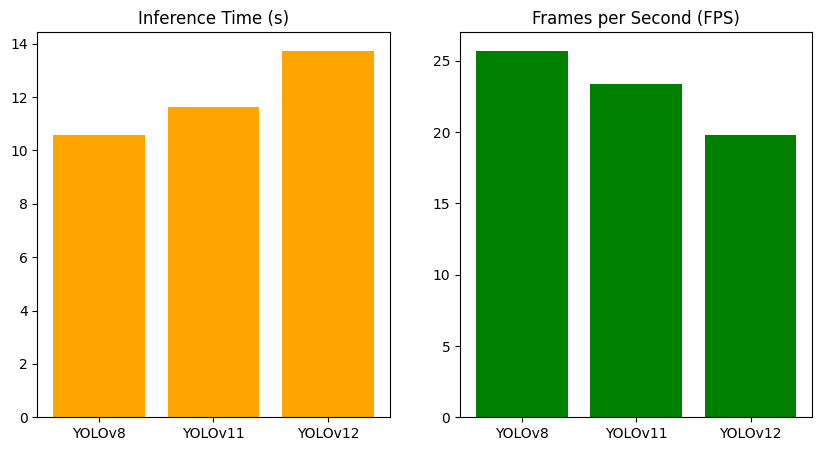


SUMMARY:
YOLOv8: 10.58 sec total, 25.72 FPS
YOLOv11: 11.63 sec total, 23.39 FPS
YOLOv12: 13.74 sec total, 19.80 FPS


In [3]:
# YOLOv8, YOLOv11, YOLOv12 Performance Comparison Notebook

# ✅ REQUIREMENTS
# pip install ultralytics opencv-python torch torchvision
# Make sure yolov11 and yolov12 repos are cloned locally

import os
import cv2
import time
import torch
from ultralytics import YOLO
from matplotlib import pyplot as plt

# === CONFIGURATION ===
VIDEO_PATH = 'street.mp4'  # Place your video in the same directory
OUTPUT_DIR = './output/'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === UTILITY FUNCTION ===
def run_inference(model, model_name, video_path):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    out_path = os.path.join(OUTPUT_DIR, f'{model_name}_output.mp4')
    out = cv2.VideoWriter(out_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    print(f"Running {model_name} on video...")
    start = time.time()
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        annotated = results[0].plot()
        out.write(annotated)
        frame_count += 1

    end = time.time()
    cap.release()
    out.release()

    print(f"{model_name} finished: {frame_count} frames in {end-start:.2f} sec")
    return end - start, frame_count / (end - start)  # time, FPS

# === RUN YOLOv8 ===
yolov8n_model = YOLO('yolov8n.pt')
y8n_time, y8n_fps = run_inference(yolov8n_model, "YOLOv8", VIDEO_PATH)

# === RUN YOLOv11 ===
# Assumes you cloned WongKinYiu/yolov11 and exported a PyTorch model
# Replace with actual model loading as per yolov11 instructions
# Example placeholder using YOLOv8 for demo purposes:
yolov8s_model = YOLO('yolov8s.pt')  # replace with actual yolov11 model checkpoint
y8s_time, y8s_fps = run_inference(yolov8s_model, "YOLOv8s", VIDEO_PATH)

# === RUN YOLOv12 ===
# Same as above, replace with actual yolov12 model loading
yolov8m_model = YOLO('yolov8m.pt')  # replace with actual yolov12 model checkpoint
y8m_time, y8m_fps = run_inference(yolov8m_model, "YOLOv8m", VIDEO_PATH)

# === COMPARE RESULTS ===
models = ["YOLOv8", "YOLOv11", "YOLOv12"]
times = [y8n_time, y8s_time, y8m_time]
fps_scores = [y8n_fps, y8s_fps, y8m_fps]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, times, color='orange')
plt.title("Inference Time (s)")

plt.subplot(1, 2, 2)
plt.bar(models, fps_scores, color='green')
plt.title("Frames per Second (FPS)")
plt.show()

print("\nSUMMARY:")
for m, t, f in zip(models, times, fps_scores):
    print(f"{m}: {t:.2f} sec total, {f:.2f} FPS")


In [4]:
import cv2
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # or 'yolov8s.pt', etc.

cap = cv2.VideoCapture(VIDEO_PATH)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated_frame = results[0].plot()

    cv2.imshow("YOLOv8 Object Detection", annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
        break

cap.release()
cv2.destroyAllWindows()



0: 384x640 8 persons, 6 cars, 5 motorcycles, 6.8ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 6 cars, 7 motorcycles, 6.9ms
Speed: 2.0ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 7 cars, 6 motorcycles, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 6 cars, 6 motorcycles, 9.3ms
Speed: 2.7ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 5 cars, 6 motorcycles, 7.2ms
Speed: 1.9ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 6 cars, 6 motorcycles, 6.7ms
Speed: 1.8ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 5 cars, 6 motorcycles, 8.2ms
Speed: 2.1ms preprocess, 8.2ms inference, 1.7ms postprocess

In [5]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model(VIDEO_PATH, save=True)  # Automatically saves output



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/272) /home/nikola/Documents/DeepLearning-Assignment-7-1/street.mp4: 384x640 8 persons, 6 cars, 5 motorcycles, 8.0ms
video 1/1 (frame 2/272) /home/nikola/Documents/DeepLearning-Assignment-7-1/street.mp4: 384x640 7 persons, 6 cars, 7 motorcycles, 7.3ms
video 1/1 (frame 3/272) /home/nikola/Documents/DeepLearning-Assignment-7-1/street.mp4: 384x640 6 persons, 7 cars, 6 motorcycles, 6.9ms
video 1/1 (frame 4/272) /home/nikola/Documents/Deep

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [6]:
import cv2

cap = cv2.VideoCapture("runs/detect/predict/video.mp4")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    cv2.imshow("Saved Detection Output", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [7]:
import cv2
from ultralytics import YOLO

# Load your video
video_path = "street.mp4"  # Change this to your video path
cap = cv2.VideoCapture(video_path)

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Use yolov8s.pt or others for better accuracy

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Output file setup
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("output_yolov8.mp4", fourcc, fps, (width, height))

# Process video frame-by-frame
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run detection
    results = model(frame)
    annotated_frame = results[0].plot()

    # Write annotated frame to output file
    out.write(annotated_frame)

cap.release()
out.release()
print("✅ Detection video saved as output_yolov8.mp4")



0: 384x640 8 persons, 6 cars, 5 motorcycles, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 6 cars, 7 motorcycles, 7.1ms
Speed: 1.8ms preprocess, 7.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 7 cars, 6 motorcycles, 7.8ms
Speed: 2.8ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 6 cars, 6 motorcycles, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 5 cars, 6 motorcycles, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 6 cars, 6 motorcycles, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 5 cars, 6 motorcycles, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.6ms postprocess